In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mision_espacial import MisionEspacial, NaveAction  # Asegúrate de importar correctamente

pygame 2.1.0 (SDL 2.0.16, Python 3.9.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


Tasa de convergencia: -0.057823129251700675


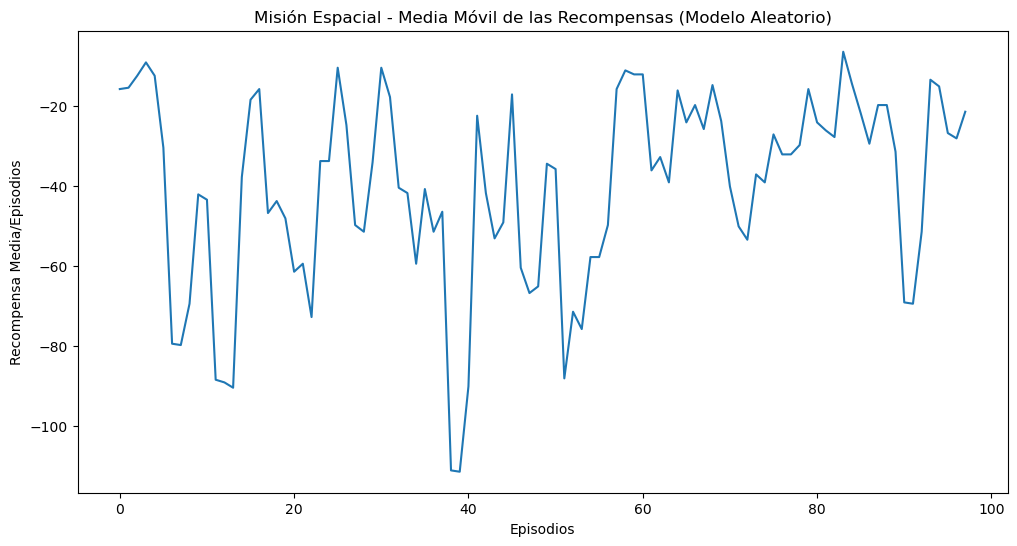

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Inicialización del entorno
env = MisionEspacial()

# Configuración de los parámetros
episodes = 100  
ep_rewards = []

# Inicialización de la gráfica
plt.ion()
fig, ax = plt.subplots(figsize=(12, 6))

for episode in range(episodes):
    env.reset()
    done = False
    total_reward = 0

    while not done:
        # Selección de acción aleatoria usando random.choice
        action_enum = random.choice(list(NaveAction))

        done = env.perform_action(action_enum)
        reward = 1 if done else -1
        env.render()

        total_reward += reward

    ep_rewards.append(total_reward)

# Calcular la media móvil
window_size = 3  
moving_avg_rewards = np.convolve(ep_rewards, np.ones(window_size)/window_size, mode='valid')

# Calcular la tasa de convergencia
convergence_rate = (moving_avg_rewards[-1] - moving_avg_rewards[0]) / len(moving_avg_rewards)
print("Tasa de convergencia:", convergence_rate)

# Graficar la recompensa promedio móvil
plt.plot(np.arange(len(moving_avg_rewards)), moving_avg_rewards)
plt.title('Misión Espacial - Media Móvil de las Recompensas (Modelo Aleatorio)')
plt.ylabel('Recompensa Media/Episodios')
plt.xlabel('Episodios')
plt.show()

env.close()
plt.ioff()
plt.show()
